# ICD Project

## Importing libraries

In [176]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
import contractions
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import pos_tag
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.corpora import Dictionary
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/dani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Load Dataset

In [177]:
data = pd.read_csv('icd_scopus.csv')
data

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,NaN,NaN,NaN,International Conference on Applied Research i...,2023,Springer Proceedings in Business and Economics,NaN,NaN,NaN,NaN,...,978-981198484-6,NaN,NaN,English,Springer Proc. Bus. Econ.,Conference review,Final,NaN,Scopus,2-s2.0-85161683590
1,Vargas A.C.; Magnussen R.,"Vargas, Alejandra Celis (57951796800); Magnuss...",57951796800; 55579157200,A Game-based Approach for Open Data in Educati...,2022,Proceedings of the European Conference on Game...,2022-October,NaN,NaN,139,...,978-191458751-1,NaN,NaN,English,Proc. European Conf. Games-based Learn.,Conference paper,Final,NaN,Scopus,2-s2.0-85141152410
2,Fiş Erümit S.; Karakuş Yılmaz T.,"Fiş Erümit, S. (36343307300); Karakuş Yılmaz, ...",36343307300; 24166942000,Gamification Design in Education: What Might G...,2022,"Technology, Knowledge and Learning",27,4,NaN,1039,...,NaN,ICMLF,NaN,English,Tech. Knowl. Learn.,Article,Final,NaN,Scopus,2-s2.0-85128920438
3,Alsamawi F.N.; Kurnaz S.,"Alsamawi, Farazdaq Nahedh (57224682003); Kurna...",57224682003; 57203640255,A framework for adopting gamified learning sys...,2023,Applied Nanoscience (Switzerland),13,2,NaN,1135,...,NaN,NaN,NaN,English,Appl. Nanosci. (Switzerland),Article,Final,All Open Access; Bronze Open Access; Green Ope...,Scopus,2-s2.0-85108164717
4,Karnalim O.; Simon; Chivers W.,"Karnalim, Oscar (57191242240); Simon (74097108...",57191242240; 7409710825; 6505969230,Non-game Incentives in Gamified Programming Ed...,2023,Lecture Notes in Networks and Systems,633 LNNS,NaN,NaN,910,...,978-303126875-5,NaN,NaN,English,Lect. Notes Networks Syst.,Conference paper,Final,NaN,Scopus,2-s2.0-85151127571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Unkelos-Shpigel N.,"Unkelos-Shpigel, Naomi (55786671200)",55786671200,Peel the onion: Use of collaborative and gamif...,2016,Lecture Notes in Business Information Processing,249,NaN,NaN,122,...,978-331939563-0,NaN,NaN,English,Lect. Notes Bus. Inf. Process.,Conference paper,Final,NaN,Scopus,2-s2.0-84976621686
378,Chou C.C.; He S.-J.; Olsen J.,"Chou, Chientzu Candace (56900344000); He, Shi-...",56900344000; 57190391124; 57200244427,The impact of badges on course participation a...,2015,Workshop Proceedings of the 23rd International...,NaN,NaN,NaN,333,...,978-499080147-2,NaN,NaN,English,"Workshop Proc. Int. Conf. Comput. Educ., ICCE",Conference paper,Final,NaN,Scopus,2-s2.0-85040455534
379,Zarzycki A.,"Zarzycki, Andrzej (33668016500)",33668016500,Teaching and Designing for Augmented Reality,2014,Proceedings of the International Conference on...,1,NaN,NaN,357,...,978-949120707-5,NaN,NaN,English,Proc. Int. Conf. Educ. Res. Comput. Aided. Arc...,Conference paper,Final,NaN,Scopus,2-s2.0-85006776989
380,Arias Aranda D.; Bustinza Sánchez O.F.; Djundu...,"Arias Aranda, Daniel (7801374665); Bustinza Sá...",7801374665; 35791444600; 57016876400,Effects of gamified business simulations on en...,2016,Revista de Educacion,2016,371,NaN,126,...,NaN,NaN,NaN,English,Revista Educ.,Article,Final,NaN,Scopus,2-s2.0-84951275541


## Basic exploratory content analysis

### Understanding the dataset

In [178]:
# Checking the shape of the dataset
data.shape

(382, 46)

In [179]:
# View the first 5 rows of the dataset
data.head(5)

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,NaN,NaN,NaN,International Conference on Applied Research i...,2023,Springer Proceedings in Business and Economics,NaN,NaN,NaN,NaN,...,978-981198484-6,NaN,NaN,English,Springer Proc. Bus. Econ.,Conference review,Final,NaN,Scopus,2-s2.0-85161683590
1,Vargas A.C.; Magnussen R.,"Vargas, Alejandra Celis (57951796800); Magnuss...",57951796800; 55579157200,A Game-based Approach for Open Data in Educati...,2022,Proceedings of the European Conference on Game...,2022-October,NaN,NaN,139,...,978-191458751-1,NaN,NaN,English,Proc. European Conf. Games-based Learn.,Conference paper,Final,NaN,Scopus,2-s2.0-85141152410
2,Fiş Erümit S.; Karakuş Yılmaz T.,"Fiş Erümit, S. (36343307300); Karakuş Yılmaz, ...",36343307300; 24166942000,Gamification Design in Education: What Might G...,2022,"Technology, Knowledge and Learning",27,4,NaN,1039,...,NaN,ICMLF,NaN,English,Tech. Knowl. Learn.,Article,Final,NaN,Scopus,2-s2.0-85128920438
3,Alsamawi F.N.; Kurnaz S.,"Alsamawi, Farazdaq Nahedh (57224682003); Kurna...",57224682003; 57203640255,A framework for adopting gamified learning sys...,2023,Applied Nanoscience (Switzerland),13,2,NaN,1135,...,NaN,NaN,NaN,English,Appl. Nanosci. (Switzerland),Article,Final,All Open Access; Bronze Open Access; Green Ope...,Scopus,2-s2.0-85108164717
4,Karnalim O.; Simon; Chivers W.,"Karnalim, Oscar (57191242240); Simon (74097108...",57191242240; 7409710825; 6505969230,Non-game Incentives in Gamified Programming Ed...,2023,Lecture Notes in Networks and Systems,633 LNNS,NaN,NaN,910,...,978-303126875-5,NaN,NaN,English,Lect. Notes Networks Syst.,Conference paper,Final,NaN,Scopus,2-s2.0-85151127571


## Data Cleaning

### Checking for duplicate rows

In [180]:
data.duplicated().sum()

0

### Cheking for null values


In [181]:
# Checking for missing values
data.isna().sum()

Authors                           18
Author full names                 18
Author(s) ID                      18
Title                              0
Year                               0
Source title                       0
Volume                           103
Issue                            223
Art. No.                         296
Page start                       108
Page end                         112
Page count                        98
Cited by                           0
DOI                               74
Link                               0
Affiliations                      20
Authors with affiliations         20
Abstract                           0
Author Keywords                   41
Index Keywords                   150
Molecular Sequence Numbers       382
Chemicals/CAS                    378
Tradenames                       381
Manufacturers                    382
Funding Details                  278
Funding Texts                    280
References                        24
C

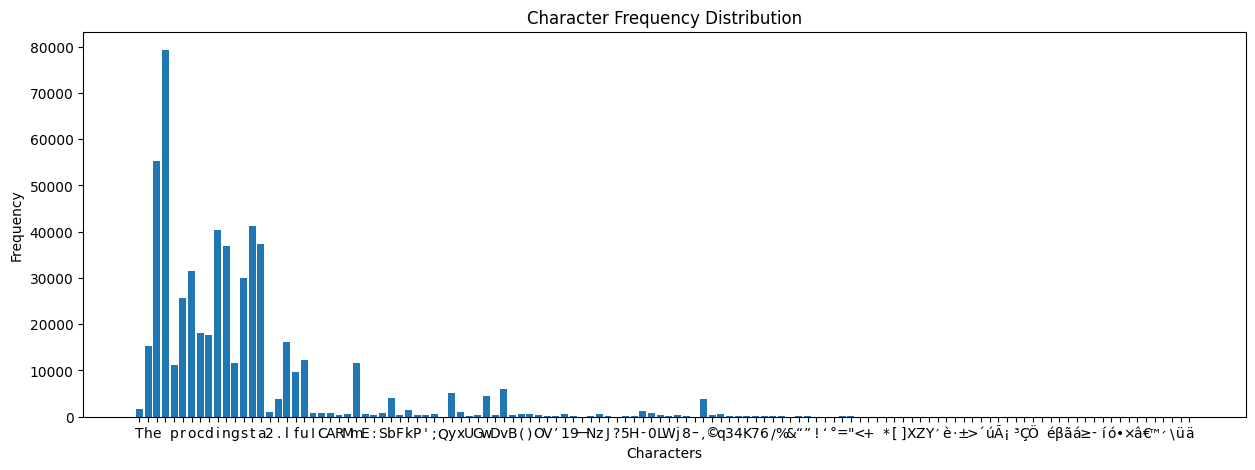

In [231]:
# Check special carateres and punctuation frequency
char_freq = Counter(data['Abstract'].str.cat())

# Prepare data for plotting
char_labels, char_values = zip(*char_freq.items())

# Create the plot
plt.figure(figsize=(15, 5))
plt.bar(char_labels, char_values)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Distribution')
plt.show()



of
the
and
in
pp
a
learning
education
gamification
to


/home/dani/Desktop/MCTW-2ANO/ICD/.venv/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


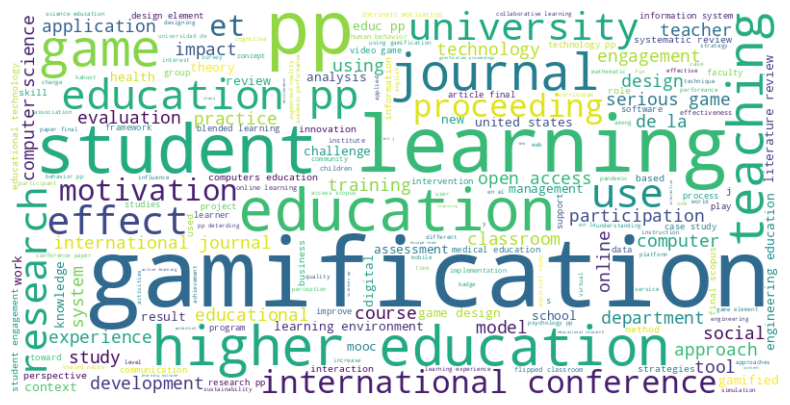

In [225]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Combine all text columns into a single series
text_series = df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Tokenize the text
all_text = ' '.join(text_series)
tokens = word_tokenize(all_text)
tokens = [word.lower() for word in tokens if word.isalpha()]

# Count word occurrences
word_counts = Counter(tokens)

# Display the most common words
most_common_words = word_counts.most_common(10)  # Change 10 to the desired number of most common words
for word, _ in most_common_words:
    print(f"{word}")

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Basic Text pre-processing

### Remove useless columns in the context and columns with NaN values

In [187]:
columns_to_drop = ['Author(s) ID', 'Author full names', 'Volume', 'Issue', 'Art. No.', 'Funding Details', 'Conference code', 'Conference location', 'Conference name', 'Conference date', 'Funding Texts', 'Editors', 'Open Access', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Sponsors', 'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'ISBN', 'CODEN', 'PubMed ID', 'Authors', 'Year', 'Index Keywords', 'References', 'Correspondence Address', 'Publisher', 'ISSN', 'Language of Original Document', 'Document Type', 'Publication Stage', 'Source', 'EID']

droped_data = data.drop(columns=columns_to_drop)
droped_data

,Title,Source title,Abstract,Author Keywords,Abbreviated Source Title
0,International Conference on Applied Research i...,Springer Proceedings in Business and Economics,The proceedings contain 22 papers. The special...,NaN,Springer Proc. Bus. Econ.
1,A Game-based Approach for Open Data in Educati...,Proceedings of the European Conference on Game...,Open Data is defined as digital data that is m...,Education; Game-based learning; Open Data; Rea...,Proc. European Conf. Games-based Learn.
2,Gamification Design in Education: What Might G...,"Technology, Knowledge and Learning",The purpose of this study was to propose desig...,Game Mechanics and Dynamics; Gamification Desi...,Tech. Knowl. Learn.
3,A framework for adopting gamified learning sys...,Applied Nanoscience (Switzerland),The outbreak of COVID 19 has increased the anx...,Games; Gamification; Gamified learning system;...,Appl. Nanosci. (Switzerland)
4,Non-game Incentives in Gamified Programming Ed...,Lecture Notes in Networks and Systems,"When gamification is used in education, non-ga...",Academic integrity; Gamification; Non-game inc...,Lect. Notes Networks Syst.
...,...,...,...,...,...
377,Peel the onion: Use of collaborative and gamif...,Lecture Notes in Business Information Processing,As software engineering and information system...,Collaboration; Education; Gamification,Lect. Notes Bus. Inf. Process.
378,The impact of badges on course participation a...,Workshop Proceedings of the 23rd International...,Badges have long been used to encourage users ...,Badges; Gamification; Interaction; Online lear...,"Workshop Proc. Int. Conf. Comput. Educ., ICCE"
379,Teaching and Designing for Augmented Reality,Proceedings of the International Conference on...,This paper discusses ways emerging interactive...,AR; Augmented Reality; Gamification; Mobile Cu...,Proc. Int. Conf. Educ. Res. Comput. Aided. Arc...
380,Effects of gamified business simulations on en...,Revista de Educacion,Business simulations and Gamification have bee...,Entrepreneurial orientation; Gamification; Lea...,Revista Educ.


In [188]:
# Get the number of duplicates
duplicate = droped_data['Abstract'].duplicated().sum()
duplicate

# Remove duplicate rows
droped_data = droped_data.drop_duplicates(subset=['Abstract'])
droped_data.shape

(380, 5)

In [189]:

#do the same for title
# Get the number of duplicates
duplicate = droped_data['Title'].duplicated().sum()
duplicate

# Remove duplicate rows
droped_data = droped_data.drop_duplicates(subset=['Title'])
droped_data.shape

(374, 5)

gamification
learning
students
education
participation
study
game
student
design
motivation


/home/dani/Desktop/MCTW-2ANO/ICD/.venv/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


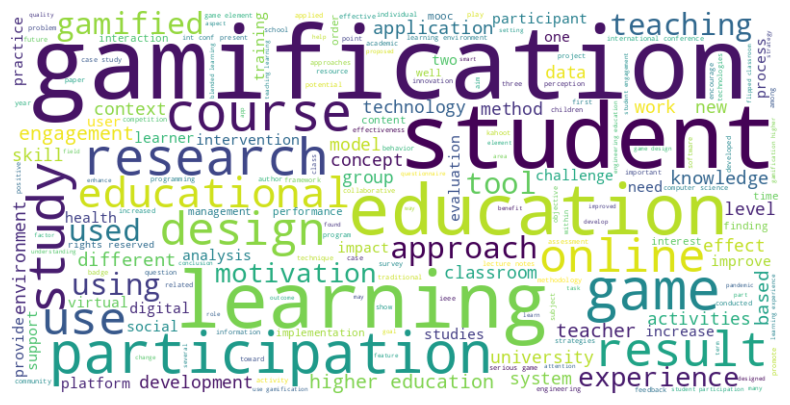

In [191]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Combine all text columns into a single series
text_series = droped_data.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Tokenize the text
all_text = ' '.join(text_series)
tokens = word_tokenize(all_text)

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
custom_words = set(['pp', 'de'])
stop_words.update(custom_words)
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words and word not in string.punctuation]

# Count word occurrences
word_counts = Counter(tokens)

# Display the most common words
most_common_words = word_counts.most_common(10)  # Change 10 to the desired number of most common words
for word, _ in most_common_words:
    print(f"{word}")

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **2. Preprocess the dataset**


### Clean up function

In [192]:
def clean_text(text_string, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', text_string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    string = re.sub(r'[^\w\s]', '', string)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    filtered_words = [word for word in string.split() if word not in stopwords.words('english')]

    # Custom stop words list
    customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                  "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                  "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    # Applying custom stop words
    final_words = list(set(filtered_words) - set(customlist))

    # Tokenization
    tokens = word_tokenize(' '.join(final_words))

    # Remove numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    # Fix contractions
    final_string = ' '.join([contractions.fix(word) for word in stemmed_words])

    return final_string

In [193]:
droped_data

,Title,Source title,Abstract,Author Keywords,Abbreviated Source Title
0,International Conference on Applied Research i...,Springer Proceedings in Business and Economics,The proceedings contain 22 papers. The special...,NaN,Springer Proc. Bus. Econ.
1,A Game-based Approach for Open Data in Educati...,Proceedings of the European Conference on Game...,Open Data is defined as digital data that is m...,Education; Game-based learning; Open Data; Rea...,Proc. European Conf. Games-based Learn.
2,Gamification Design in Education: What Might G...,"Technology, Knowledge and Learning",The purpose of this study was to propose desig...,Game Mechanics and Dynamics; Gamification Desi...,Tech. Knowl. Learn.
3,A framework for adopting gamified learning sys...,Applied Nanoscience (Switzerland),The outbreak of COVID 19 has increased the anx...,Games; Gamification; Gamified learning system;...,Appl. Nanosci. (Switzerland)
4,Non-game Incentives in Gamified Programming Ed...,Lecture Notes in Networks and Systems,"When gamification is used in education, non-ga...",Academic integrity; Gamification; Non-game inc...,Lect. Notes Networks Syst.
...,...,...,...,...,...
377,Peel the onion: Use of collaborative and gamif...,Lecture Notes in Business Information Processing,As software engineering and information system...,Collaboration; Education; Gamification,Lect. Notes Bus. Inf. Process.
378,The impact of badges on course participation a...,Workshop Proceedings of the 23rd International...,Badges have long been used to encourage users ...,Badges; Gamification; Interaction; Online lear...,"Workshop Proc. Int. Conf. Comput. Educ., ICCE"
379,Teaching and Designing for Augmented Reality,Proceedings of the International Conference on...,This paper discusses ways emerging interactive...,AR; Augmented Reality; Gamification; Mobile Cu...,Proc. Int. Conf. Educ. Res. Comput. Aided. Arc...
380,Effects of gamified business simulations on en...,Revista de Educacion,Business simulations and Gamification have bee...,Entrepreneurial orientation; Gamification; Lea...,Revista Educ.


In [194]:
#converts all the values in a specific columns of the DataFrame data to strings 
droped_data["Abstract"] = droped_data["Abstract"].astype(str) 

#Applying a Text Cleaning Function
droped_data['clean_Abstract'] = droped_data['Abstract'].apply(clean_text)

In [195]:
droped_data['clean_Abstract']

0      firm educ countri focus creativ emot compani p...
1      gamifi work educ project critic realist fact l...
2      addit concret result follow construct exclus d...
3      gamifi countri readi deploy critic literatur k...
4      plagiar educ term graderelev perform exclus sw...
                             ...                        
377    open switzerland softwar natur integr curricul...
378    project goal incentiv differ environ examin im...
379    educ project issu realiti applic fashion parti...
380    gamifi educ even desir dimens manag innov coul...
381    object differ integr motiv discuss virtual com...
Name: clean_Abstract, Length: 374, dtype: object

In [196]:
#... aims to create a new DataFrame called selected_columns that contains only the "Title" and "cleanTitle" columns from the original DataFrame df. Then, it displays the first 20 rows of this new DataFrame using the .head(20) method.
selected_columns = droped_data[['Abstract', 'clean_Abstract']]
selected_columns.head(20)

,Abstract,clean_Abstract
0,The proceedings contain 22 papers. The special...,firm educ countri focus creativ emot compani p...
1,Open Data is defined as digital data that is m...,gamifi work educ project critic realist fact l...
2,The purpose of this study was to propose desig...,addit concret result follow construct exclus d...
3,The outbreak of COVID 19 has increased the anx...,gamifi countri readi deploy critic literatur k...
4,"When gamification is used in education, non-ga...",plagiar educ term graderelev perform exclus sw...
5,Underachievers - students have poor academic p...,attitud gamifi style experi environ motiv grad...
6,Climate change caused by excessive carbon emis...,face gamifi theori promis could offer competit...
7,Despite the exponential success of using creat...,gamifi work motiv question incorpor creativ ac...
8,"In the era of digital education, it makes sens...",experi educ help room new teachinglearn paper ...
9,One of the main problems of Massive Open Onlin...,gamifi term educ open environ notorieti impact...


/home/dani/Desktop/MCTW-2ANO/ICD/.venv/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/home/dani/Desktop/MCTW-2ANO/ICD/.venv/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


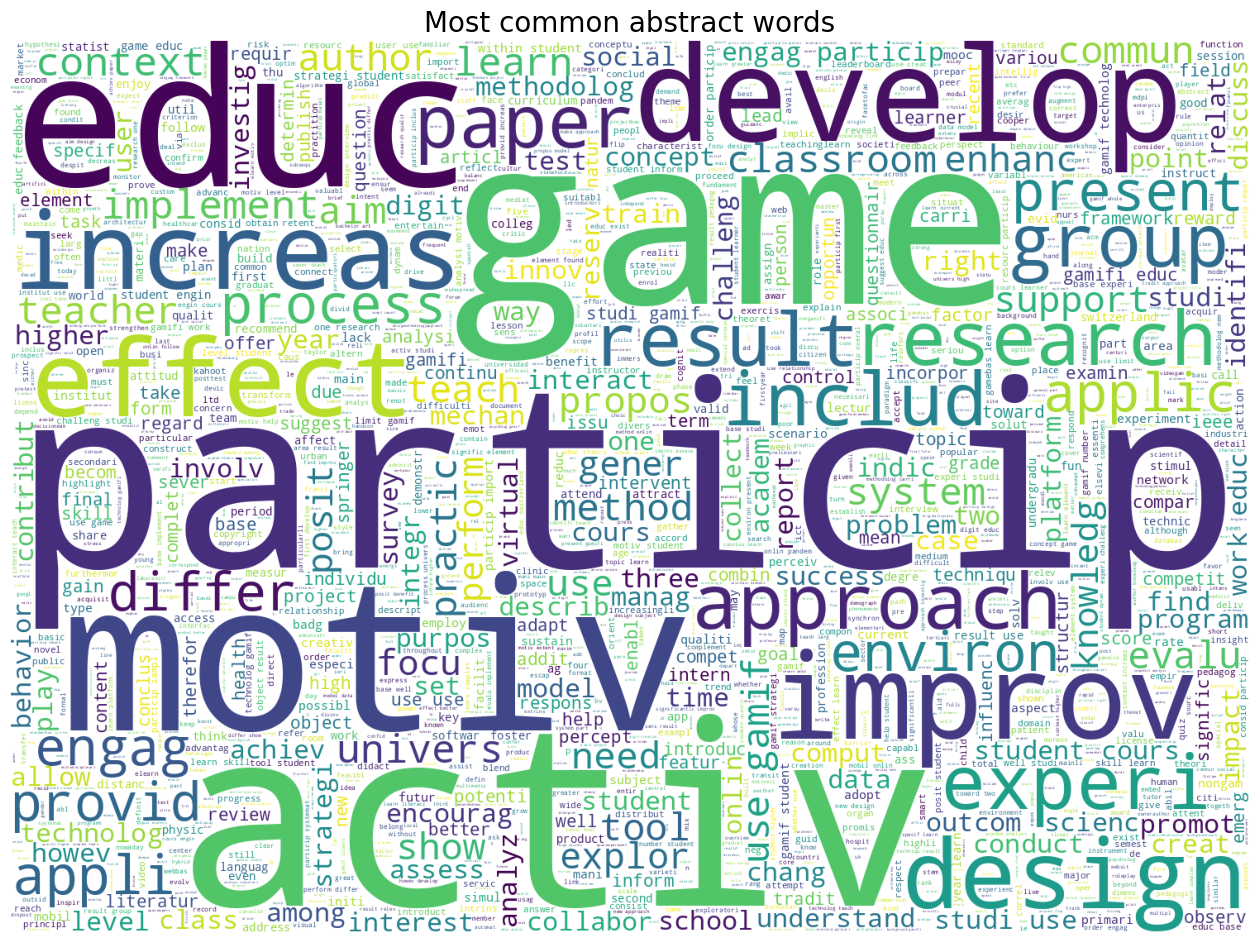

In [197]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='white',max_words = 10000, width=1500, stopwords=STOPWORDS,
                          height=1080).generate(" ".join(droped_data["clean_Abstract"]))
plt.title("Most common abstract words", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

## Representing text

### Bag-Of-Words ou 1 gram

In [198]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'cleanTitle' column
X = vectorizer.fit_transform(droped_data['clean_Abstract'])

# Convert the BoW array into a DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show the resulting DataFrame
print(bow_df)


     aabb  aalborg  ab  abab  abandon  abandonedvac  abdulaziz  abierto  abil  \
0       0        0   0     0        0             0          0        0     0   
1       0        0   0     0        0             0          0        0     0   
2       0        0   0     0        0             0          0        0     0   
3       0        0   0     0        0             0          1        0     0   
4       0        0   0     0        0             0          0        0     0   
..    ...      ...  ..   ...      ...           ...        ...      ...   ...   
369     0        0   0     0        0             0          0        0     0   
370     0        0   0     0        0             0          0        0     0   
371     0        0   0     0        0             0          0        0     0   
372     0        0   0     0        0             0          0        0     0   
373     0        0   0     0        0             0          0        0     0   

     abl  ...  zaragoza  zh

### N-Grams

In [199]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(droped_data['clean_Abstract'])


n_grams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df)

                                               Authors  \
0                                                  NaN   
1                            Vargas A.C.; Magnussen R.   
2                     Fiş Erümit S.; Karakuş Yılmaz T.   
3                             Alsamawi F.N.; Kurnaz S.   
4                       Karnalim O.; Simon; Chivers W.   
..                                                 ...   
377                                 Unkelos-Shpigel N.   
378                      Chou C.C.; He S.-J.; Olsen J.   
379                                        Zarzycki A.   
380  Arias Aranda D.; Bustinza Sánchez O.F.; Djundu...   
381                                           Cronk R.   

                                     Author full names  \
0                                                  NaN   
1    Vargas, Alejandra Celis (57951796800); Magnuss...   
2    Fiş Erümit, S. (36343307300); Karakuş Yılmaz, ...   
3    Alsamawi, Farazdaq Nahedh (57224682003); Kurna...   
4    Karnalim

*Bar Plot for Most Common N-Grams*

You can use a bar plot to visualize the most common N-grams in the corpus.

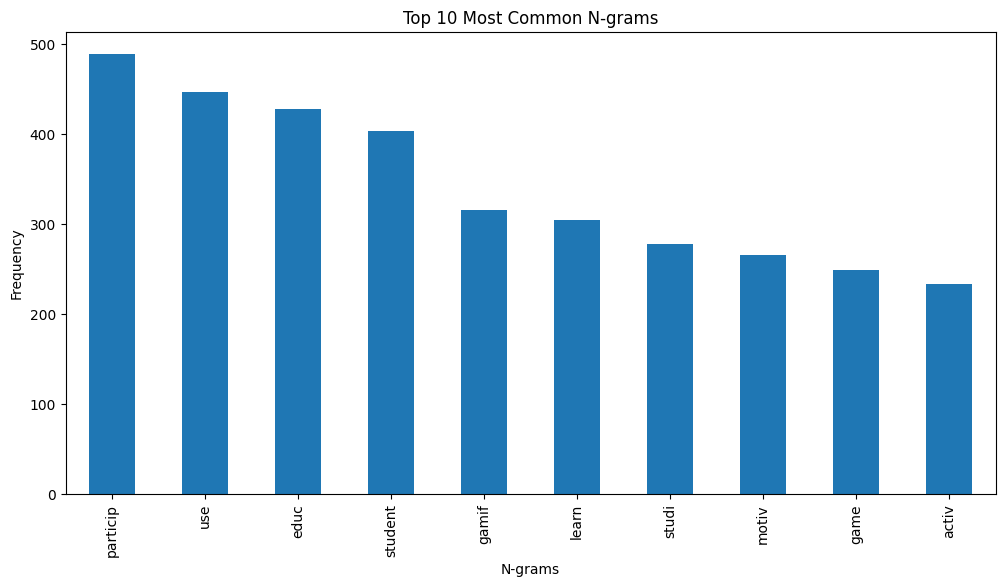

In [200]:
# Sum up the counts of each bigram
sum_bigrams = n_grams_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_bigrams = sum_bigrams.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_bigrams.plot(kind='bar')
plt.title('Top 10 Most Common N-grams')
plt.xlabel('N-grams')
plt.ylabel('Frequency')
plt.show()


### Term Frequency-Inverse Document Frequency (TF-IDF)

In [201]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned abstracts
tfidf_matrix = tfidf_vectorizer.fit_transform(droped_data['clean_Abstract'])

# Convert to array and then to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)


     aabb  aalborg   ab  abab  abandon  abandonedvac  abdulaziz  abierto  \
0     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
1     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
2     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
3     0.0      0.0  0.0   0.0      0.0           0.0   0.156839      0.0   
4     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
..    ...      ...  ...   ...      ...           ...        ...      ...   
369   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
370   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
371   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
372   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
373   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   

     abil  abl  ...  zaragoza  zhang  zhejiang  zimbabw  zoom  zou  zulia  \
0     0.0 

*Bar Plot for Most Common TF-IDF*

You can use a bar plot to visualize the most common TF-IDF in the corpus.

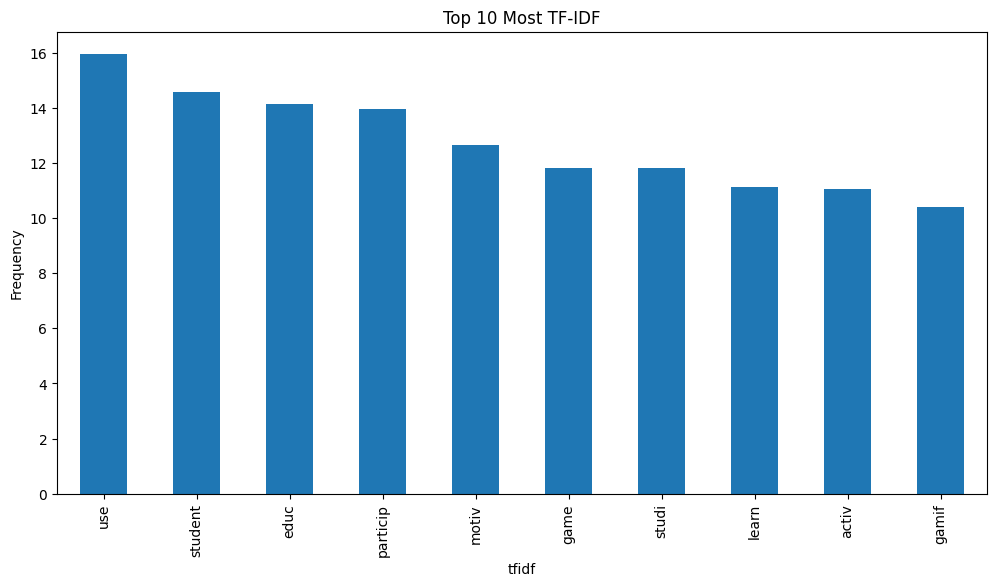

In [202]:
# Sum up the counts of each bigram
sum_tfidf = tfidf_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_tfidf = sum_tfidf.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_tfidf.plot(kind='bar')
plt.title('Top 10 Most TF-IDF')
plt.xlabel('tfidf')
plt.ylabel('Frequency')
plt.show()


## Part of Speech (POS) Tagging

In [203]:
# Function to tag POS in a sentence
def pos_tag_sentence(sentence):
    tokens = word_tokenize(sentence)
    return pos_tag(tokens)

# Apply POS tagging to each cleaned abstract
droped_data['POS_Tagged_Abstract'] = droped_data['clean_Abstract'].apply(pos_tag_sentence)

# Display the DataFrame
print(droped_data[['clean_Abstract', 'POS_Tagged_Abstract']].head())


                                      clean_Abstract  \
0  firm educ countri focus creativ emot compani p...   
1  gamifi work educ project critic realist fact l...   
2  addit concret result follow construct exclus d...   
3  gamifi countri readi deploy critic literatur k...   
4  plagiar educ term graderelev perform exclus sw...   

                                 POS_Tagged_Abstract  
0  [(firm, NN), (educ, VBZ), (countri, JJ), (focu...  
1  [(gamifi, NN), (work, NN), (educ, NN), (projec...  
2  [(addit, NN), (concret, NN), (result, NN), (fo...  
3  [(gamifi, NN), (countri, NN), (readi, NN), (de...  
4  [(plagiar, JJ), (educ, JJ), (term, NN), (grade...  


**Frequency Distribution of POS Tags**

Bar chart to show the frequency distribution of different POS tags across all abstracts.

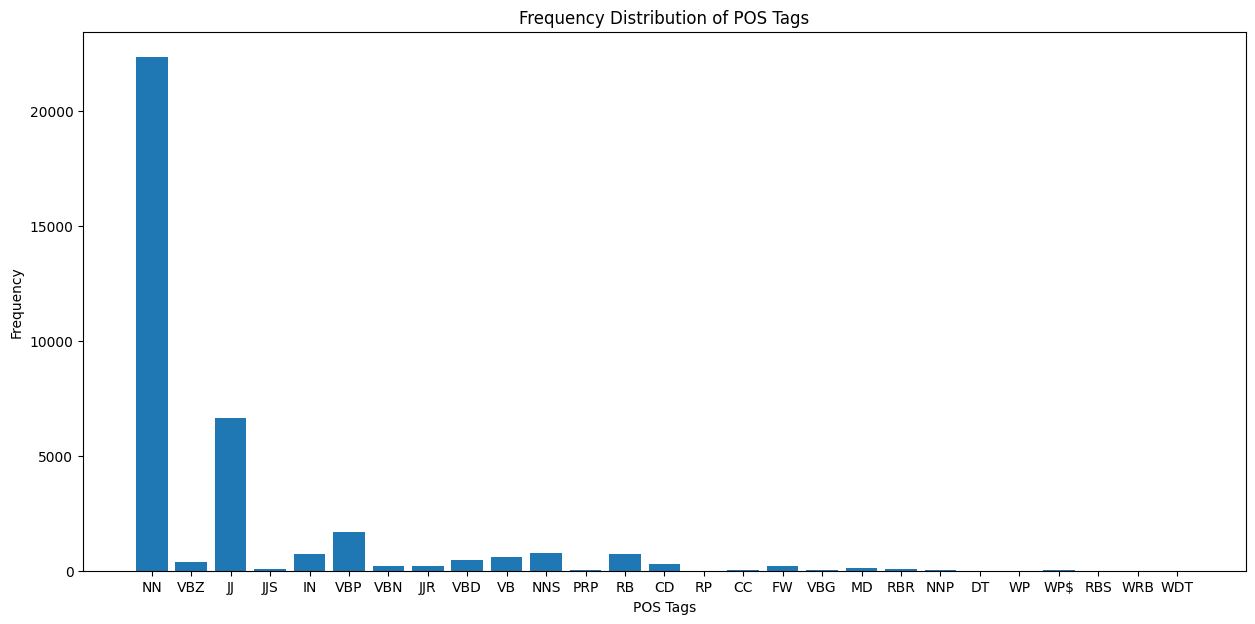

In [204]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Flatten the list of all POS tags from all abstracts
all_tags = list(itertools.chain.from_iterable(droped_data['POS_Tagged_Abstract'].apply(lambda x: [tag for word, tag in x])))

# Count the frequency of each POS tag
tag_freq = Counter(all_tags)

# Create a bar chart
plt.figure(figsize=(15, 7))
plt.bar(tag_freq.keys(), tag_freq.values())
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of POS Tags')
plt.show()


**Pie Chart for Overall Tag Distribution**

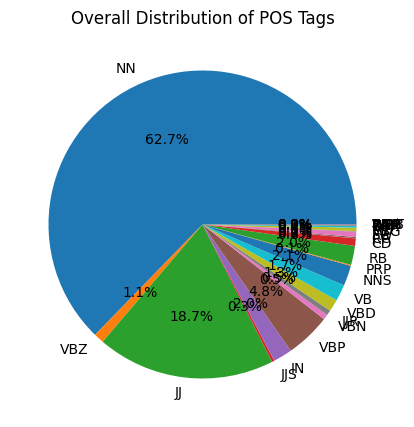

In [205]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(tag_freq.values(), labels=tag_freq.keys(), autopct='%1.1f%%')
plt.title('Overall Distribution of POS Tags')
plt.show()


In [206]:
document=droped_data['clean_Abstract']
document

0      firm educ countri focus creativ emot compani p...
1      gamifi work educ project critic realist fact l...
2      addit concret result follow construct exclus d...
3      gamifi countri readi deploy critic literatur k...
4      plagiar educ term graderelev perform exclus sw...
                             ...                        
377    open switzerland softwar natur integr curricul...
378    project goal incentiv differ environ examin im...
379    educ project issu realiti applic fashion parti...
380    gamifi educ even desir dimens manag innov coul...
381    object differ integr motiv discuss virtual com...
Name: clean_Abstract, Length: 374, dtype: object

In [207]:
def preprocess_data(documents):
    # Tokenize the documents and remove stopwords
    texts = [[word for word in simple_preprocess(str(doc))] for doc in document]
    
    # Return the list of tokenized and preprocessed texts
    return texts


In [208]:
# Process the documents using the previously defined preprocessing function
processed_texts = preprocess_data(droped_data)
processed_texts

[['firm',
  'educ',
  'countri',
  'focus',
  'creativ',
  'emot',
  'compani',
  'practic',
  'urban',
  'chain',
  'manag',
  'literatur',
  'fsc',
  'programm',
  'motiv',
  'forest',
  'bank',
  'tool',
  'student',
  'report',
  'appli',
  'vision',
  'backth',
  'employe',
  'circular',
  'effect',
  'presid',
  'topic',
  'offic',
  'femal',
  'learn',
  'consult',
  'via',
  'tourism',
  'incom',
  'special',
  'sustain',
  'contain',
  'growth',
  'market',
  'exhaust',
  'proceed',
  'adopt',
  'plan',
  'mobil',
  'moder',
  'inbound',
  'sustain',
  'trump',
  'chang',
  'blockchain',
  'use',
  'educationnexu',
  'promis',
  'turnov',
  'effici',
  'suppli',
  'intern',
  'firm',
  'improv',
  'understand',
  'process',
  'includ',
  'act',
  'econom',
  'indian',
  'case',
  'mind',
  'review',
  'stakehold',
  'perceiv',
  'ownership',
  'intent',
  'nonfinanci',
  'impact',
  'smooth',
  'hungari',
  'llp',
  'enterpris',
  'creat',
  'economi',
  'teach',
  'corpor',
 

In [209]:
# Create Dictionary
id2word = corpora.Dictionary(processed_texts)


In [210]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in processed_texts]

In [211]:
# Set number of topics
num_topics = 10

In [218]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, alpha='auto', per_word_topics=True)


In [220]:
# Print the keywords for each topic
print(lda_model.print_topics())

[(0, '0.012*"use" + 0.011*"particip" + 0.011*"student" + 0.010*"educ" + 0.008*"gamif" + 0.008*"learn" + 0.007*"activ" + 0.007*"game" + 0.007*"result" + 0.007*"develop"'), (1, '0.012*"use" + 0.010*"gamif" + 0.009*"particip" + 0.008*"educ" + 0.008*"activ" + 0.008*"student" + 0.007*"motiv" + 0.006*"engag" + 0.006*"studi" + 0.006*"improv"'), (2, '0.011*"particip" + 0.011*"use" + 0.010*"educ" + 0.009*"gamif" + 0.009*"student" + 0.008*"effect" + 0.008*"learn" + 0.007*"motiv" + 0.007*"studi" + 0.007*"game"'), (3, '0.013*"use" + 0.012*"studi" + 0.011*"educ" + 0.011*"particip" + 0.009*"motiv" + 0.008*"gamif" + 0.008*"student" + 0.008*"game" + 0.007*"approach" + 0.007*"experi"'), (4, '0.015*"use" + 0.012*"particip" + 0.011*"student" + 0.010*"gamif" + 0.010*"educ" + 0.009*"game" + 0.008*"learn" + 0.008*"motiv" + 0.008*"studi" + 0.007*"effect"'), (5, '0.014*"educ" + 0.012*"use" + 0.009*"particip" + 0.008*"student" + 0.007*"learn" + 0.006*"develop" + 0.006*"gamif" + 0.005*"activ" + 0.005*"improv" +

In [219]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.42698883879884864


In [ ]:

# Assuming 'processed_texts' is your list of tokenized and preprocessed documents
dictionary = Dictionary(processed_texts)


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.019195 -0.002027       1        1  42.104481
7     -0.006110 -0.010934       2        1  10.117533
6     -0.017837 -0.003445       3        1  10.003243
3     -0.004655  0.005849       4        1   8.099248
5     -0.009189  0.024767       5        1   7.753522
4     -0.004375 -0.017628       6        1   7.080953
0     -0.000622 -0.015005       7        1   7.041931
1      0.003052  0.004098       8        1   5.496787
2      0.014864  0.022002       9        1   1.260883
8      0.044066 -0.007678      10        1   1.041417, topic_info=          Term        Freq       Total Category  logprob  loglift
84    particip  452.000000  452.000000  Default  30.0000  30.0000
30        educ  400.000000  400.000000  Default  29.0000  29.0000
109    student  377.000000  377.000000  Default  28.0000  28.0000
126        use  420.000000  420.000000  Default  27.0000  27.0000
224      studi  258.000000  258.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
93     process    1.064895  123.424370  Topic10  -5.8700  -0.1882
612    present    1.043411  121.568550  Topic10  -5.8904  -0.1934
246     differ    1.040370  119.921948  Topic10  -5.8933  -0.1827
255  implement    1.035264  115.256237  Topic10  -5.8982  -0.1479
168     experi    1.039169  156.226402  Topic10  -5.8945  -0.4483

[810 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1116      1  0.604537   abil
1116      2  0.037784   abil
1116      3  0.037784   abil
1116      4  0.075567   abil
1116      5  0.113351   abil
...     ...       ...    ...
130       5  0.105111    you
130       7  0.105111    you
130       8  0.105111    you
1582      2  0.700544    zou
3825      7  0.443263  zulia

[1883 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 7, 4, 6, 5, 1, 2, 3, 9])

In [ ]:
droped_data['clean_Abstract']

0      firm educ countri focus creativ emot compani p...
1      gamifi work educ project critic realist fact l...
2      addit concret result follow construct exclus d...
3      gamifi countri readi deploy critic literatur k...
4      plagiar educ term graderelev perform exclus sw...
                             ...                        
377    open switzerland softwar natur integr curricul...
378    project goal incentiv differ environ examin im...
379    educ project issu realiti applic fashion parti...
380    gamifi educ even desir dimens manag innov coul...
381    object differ integr motiv discuss virtual com...
Name: clean_Abstract, Length: 382, dtype: object